In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [52]:
def composite_trapezoidal_rule(func, a, b, n):
    
    h = (b - a) / n  
    x_values = [a + i * h for i in range(n + 1)]  
    integral = (func(a) + func(b)) / 2
    for x in x_values[1:-1]:
        integral += func(x)

    integral *= h 
    return integral

In [53]:
def f_1(x):
    return x**2

def f_2(x):
    return abs(x)

def f_3(x):
    if x<0.3333:
        return 0.5*np.exp(x)
    else:
        return np.exp(x)
    
def f_4(x):
    return np.sin(np.pi*x)

def f_5(x):
    return np.sin(4*np.pi*x)

In [56]:
function_list=[f_1, f_2, f_3, f_4, f_5]
real_vals = [2/3, 1, 1/2*np.exp(1/3)-1/2*np.exp(-1)+np.exp(1)-np.exp(1/3), 0, 0] 
names = ['x^2', '|x|', '(1+Θ(0,33))e^x/2', 'sin(πx)', 'sin(4πx)']

In [54]:
h = np.array([0.5**i for i in range(1,20)])

In [58]:
errors = np.zeros((len(function_list), len(h)))

for i in range(len(function_list)):
    for j in range(len(h)):
        errors[i,j] = abs(composite_trapezoidal_rule(function_list[i],-1,1,int(2/h[j])) - real_vals[i])
        


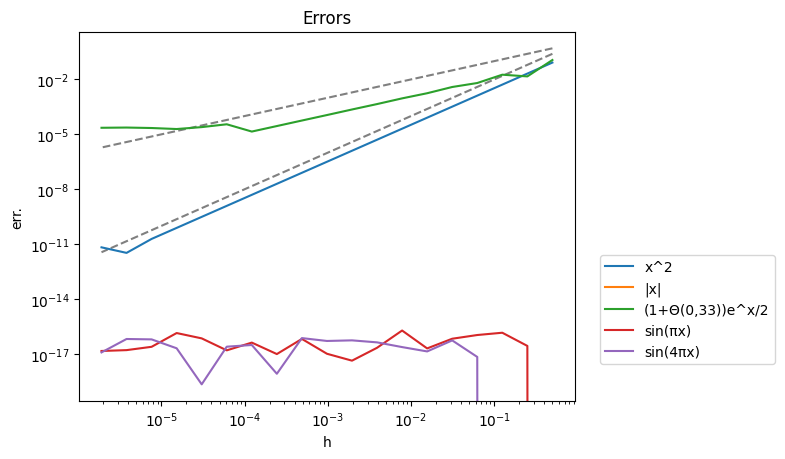

In [63]:
fig, ax = plt.subplots(1,1)
ax.plot(h, h**2, c = 'grey', linestyle = '--')
ax.plot(h, h, c = 'grey', linestyle = '--')
for i in range(len(function_list)):
    ax.plot(h, errors[i,:], label = names[i])
    ax.set( xscale='log', yscale='log',title='Errors', xlabel ='h', ylabel = 'err.')
    ax.legend(loc = (1.05,0.1))

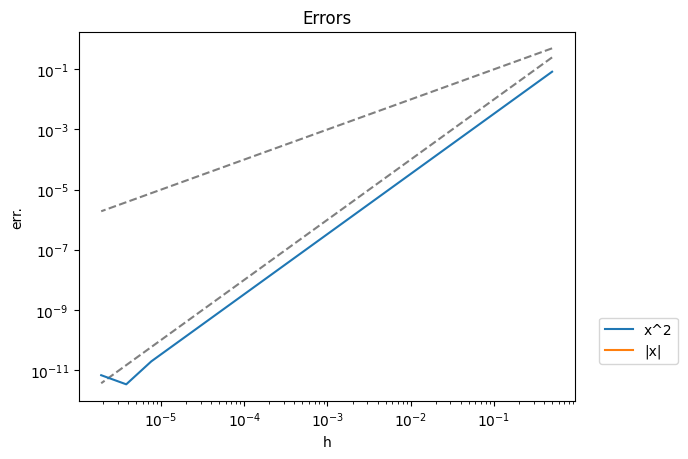

In [68]:
fig, ax = plt.subplots(1,1)
ax.plot(h, h**2, c = 'grey', linestyle = '--')
ax.plot(h, h, c = 'grey', linestyle = '--')
for i in range(len(function_list[0:2])):
    ax.plot(h, errors[i,:], label = names[i])
    ax.set( xscale='log', yscale='log',title='Errors', xlabel ='h', ylabel = 'err.')
    ax.legend(loc = (1.05,0.1))

In [69]:
errors[1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])